In [1]:
# titanic을 같이 한번 만들어 보아요!

import pandas as pd

# data loading (train data set loading)

train_df = pd.read_csv("./data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 데이터를 확인하는 작업들

# 총 몇행몇열이 있는지를 확인! => .shape
# 각 column(feature)의 세부적인 정보를 출력 => .info() 
# train_df.info()
train_df.isnull().sum(axis=0)


# 결측치와 이상치를 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
def stackedBarChart(feature):
    survived = train_df.loc[train_df["Survived"] == 1][feature].value_counts()
    # train_df["Survived"] == 1 부분이 마스크가 된다!
    survived.name = "Survived"  # name이 원 df와 똑같이 Sex로 되어 있기 때문에 바꿔줌
    dead = train_df.loc[train_df["Survived"] == 0][feature].value_counts()
    dead.name = "Dead"
    chart_df = pd.DataFrame([survived,dead])
    chart_df.plot(kind="bar",stacked=True)


In [4]:
# 어떤 feature가 생존여부에 영향을 미치는지 확인
# 그래프로 확인해보아요!
# 파이차트나 누적바차트를 많이 이용해요

# 성별이 생존여부에 영향을 미치는지 확인해보아요!
# 생존한 사람의 성별에 따른 사람수를 구해봅시다!

stackedBarChart("Sex")
# 성별은 생존여부에 많은 영향 주고 있음

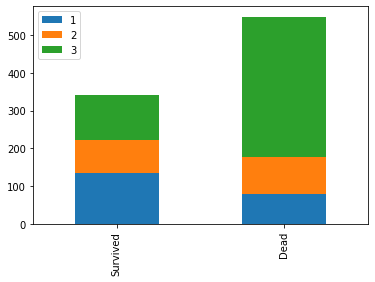

In [5]:
# 객실등급이 생존여부에 영향을 미치는지 확인해보아요!
# 생존한 사람의 객실등급(Pclass)에 따른 사람수를 구해봅시다!

stackedBarChart("Pclass")
# Pclass는 생존여부에 많은 영향 주고 있음

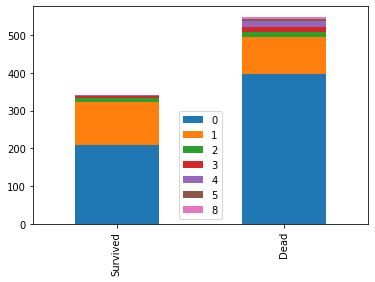

In [6]:
stackedBarChart("SibSp")

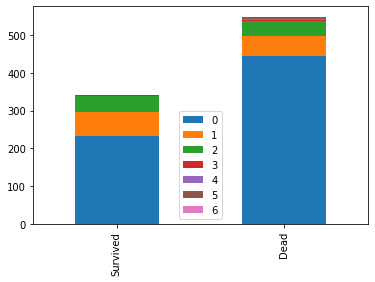

In [7]:
stackedBarChart("Parch")

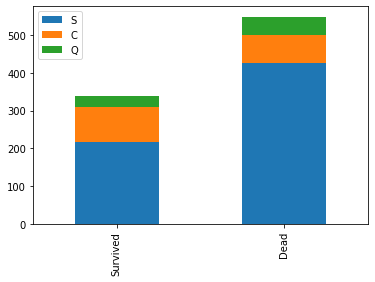

In [8]:
stackedBarChart("Embarked")

In [9]:
# Feature engineering
# Feature : column
train_df.head()  #  사용할 열 중, 문자로 되어 있는 열들의 값을 숫자로 바꿔줄 것

# text로 되어 있는 부분은 machine learning하기가 힘들어요!
# text로 되어 있는 부분은 적절한 scale의 숫자로 변환
# NaN(결측치)는 삭제하는 것보다는 적절한 값으로 대체

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 제일 먼저 해결해야 하는 feature는 Name
# name은 그 자체로 크게 의미가 없어 보이지만,
# 이름에는 특정 키워드가 들어 있고 그것이 생존에 영향을 미칠 수 있다!
train_df["Title"] = train_df["Name"].str.extract("([A-Za-z]+)\.")
# [A-Za-z]+ : 대소문자를 구별하지 않고 영문자가 여러개 나옴
# ([A-Za-z]+)\. : 영문자 여러개 나오고 끝에 점 찍히는 패턴 하나를 뽑아내라

train_df["Title"].value_counts()

# title안에 Mr, Miss, Mrs, other를 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr" :3,"Rev":3,"Col":3,
                      "Mlle":3,"Major":3,"Sir":3,"Countess":3,"Don":3,
                      "Lady":3,"Capt":3,"Mme":3,"Ms":3,"Jonkheer":3}
train_df["Title"] = train_df["Title"].map(title_mapping_dict)

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


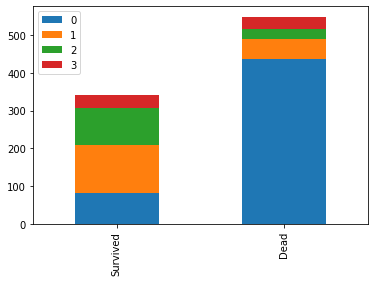

In [11]:
stackedBarChart("Title")

In [12]:
train_df.drop("PassengerId", axis = 1, inplace =True)
train_df.drop("Ticket", axis = 1, inplace =True)
train_df.drop("Cabin", axis = 1, inplace =True)
train_df.drop("Name", axis = 1, inplace =True)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,3
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,NaN,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,0


In [13]:
# 성별 컬럼에 대해 male => 0 , female => 1로 변환
sex_mapping_dict = {"male" : 0, "female" : 1}
train_df["Sex"] = train_df["Sex"].map(sex_mapping_dict)
# train_df

In [14]:
# 탑승지역의 결측치를 "S"로 대체 (S에서 가장 많은 사람들이 탔기 때문에!)
train_df["Embarked"].fillna("S",inplace=True)


# 탑승지역 컬럼에 대해 S => 0, Q =>1, C => 2로 변환
embarked_mapping_dict = {"S" : 0, "Q" : 1,"C" : 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping_dict)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,2,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,3
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,NaN,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,2,0


In [15]:
# age에는 결측치가 많아요!ㅜㅜ
# 결측치가 너무 많기 때문에 가능하면 다른 값으로 대체해줘야 합니다!
# 1) 전체 사람의 평균을 구해서 결측치를 채워요
# 2) Title을 이용해서 각 title에 맞는 평균 나이로 결측치를 채워요!
# 이건 한번 직접해보자!
age_mean = train_df.groupby("Title")["Age"].mean()
a = train_df[train_df["Title"]==0]["Age"].fillna(age_mean[0])
b = train_df[train_df["Title"]==1]["Age"].fillna(age_mean[1])
c = train_df[train_df["Title"]==2]["Age"].fillna(age_mean[2])
d = train_df[train_df["Title"]==3]["Age"].fillna(age_mean[3])
result_series = pd.concat([a,b,c,d])
result_series.sort_index()
train_df["Age"] = result_series.sort_index()
train_df

# mean_t0 = train_df.loc[train_df["Title"]==0,"Age"].mean()
# mean_t1 = train_df.loc[train_df["Title"]==1,"Age"].mean()
# mean_t2 = train_df.loc[train_df["Title"]==2,"Age"].mean()
# mean_t3 = train_df.loc[train_df["Title"]==3,"Age"].mean()
# train_df.loc[train_df["Title"]==0,["Age"]].fillna(mean_t0,inplace=True)
# train_df.loc[train_df["Title"]==1,["Age"]].fillna(mean_t1,inplace=True)
# train_df.loc[train_df["Title"]==2,["Age"]].fillna(mean_t2,inplace=True)
# train_df.loc[train_df["Title"]==3,["Age"]].fillna(mean_t3,inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,2,2
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,2
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,3
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,21.773973,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,2,0


In [16]:
# Age에 대해서 Binning 처리 (구간으로 나눠서 각 구간별로 숫자를 맵핑시키는, 머신러닝을 위한 과정)
# Binning처리를 할 때 고려해야 할 사항 => 간격을 어떻게 설정?
# Age 0 ~ 20 => 0
# Age 20초과 ~ 40 => 1
# Age 40초과 ~ 60 => 2
# Age 60초과 ~    => 3
train_df.loc[train_df["Age"] <= 20,"Age"] = 0
train_df.loc[(train_df["Age"] > 20) & (train_df["Age"]<=40),"Age"] = 1
train_df.loc[(train_df["Age"] > 40) & (train_df["Age"]<=60),"Age"] = 2
train_df.loc[train_df["Age"] > 60,"Age"] = 3
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


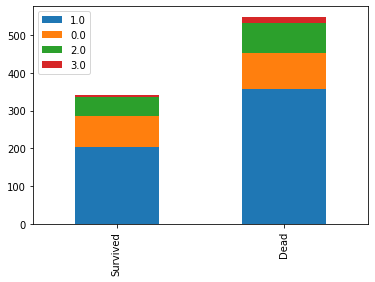

In [17]:
stackedBarChart("Age")
train_df

In [18]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,1.0,1,0,71.2833,2,2
2,1,3,1,1.0,0,0,7.9250,0,1
3,1,1,1,1.0,1,0,53.1000,0,2
4,0,3,0,1.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,3
887,1,1,1,0.0,0,0,30.0000,0,1
888,0,3,1,1.0,1,2,23.4500,0,1
889,1,1,0,1.0,0,0,30.0000,2,0


In [19]:
# Fare에 대해서 Binning 처리
# Fare 0 ~ 10 => 0
# Fare 10초과 ~ 20 => 1
# Fare 20초과 ~ 30 => 2
# Fare 30초과 ~ 40 => 3
# Fare 40초과 ~ 100 => 4
# Fare 100초과 ~ => 5

train_df.loc[train_df["Fare"] <= 10,"Fare"] = 0
train_df.loc[(train_df["Fare"] > 10) & (train_df["Fare"]<=30),"Fare"] = 1
train_df.loc[(train_df["Fare"] > 30) & (train_df["Fare"]<=100),"Fare"] = 2
train_df.loc[train_df["Fare"] > 100,"Fare"] = 3
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,1.0,1,0,2.0,2,2
2,1,3,1,1.0,0,0,0.0,0,1
3,1,1,1,1.0,1,0,2.0,0,2
4,0,3,0,1.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0,3
887,1,1,1,0.0,0,0,1.0,0,1
888,0,3,1,1.0,1,2,1.0,0,1
889,1,1,0,1.0,0,0,1.0,2,0


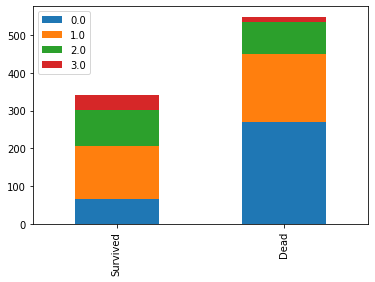

In [20]:
stackedBarChart("Fare")


In [21]:
# 모든 전처리가 끝나게 돼요
# 머신러닝으로 들어갑시다~!

## overfitting 막기 위해 필요없는 컬럼 없애주고, 비슷한 컬럼은 합쳐주고 하는 작업 필요! ##
## 알고리즘이 중요한 게 아니라, 데이터 정제를 어떻게 했는지가 정확한 머신러닝을 위해 중요! => Feature engineering

In [24]:
# Machine learning으로 들어가요
# 로지스틱 회귀를 tensorflow를 이용해서 구현해 보아요!

import tensorflow as tf
# data set을 준비해야 해요!
# 정확도를 측정하기 위해서 학습용 데이터와 평가용 데이터를 따로 분리해야 해요!
train_df

# train_df를 살짝 분리해서 학습용 데이터와 평가용 데이터를 생성
# 상위 80%를 학습용, 20%를 평가용 데이터로 사용
train_df.shape  # 튜플! 리스트처럼 인덱스 사용 가능
train_num = int(train_df.shape[0] * 0.8)      # 712

# Train data set & Test data set 만들어주기!!!
train_x_data = train_df.drop("Survived",axis=1,inplace=False)[:train_num].values
# inplace = F : 원본은 변하지 않게 처리  # values붙여서 값 형태로 도출
test_x_data = train_df.drop("Survived",axis=1,inplace=False)[train_num:].values

train_y_data = train_df["Survived"][:train_num].values.reshape([-1,1])
# reshape([-1,1]) => 컬럼 하나짜리 2차원 형태로 만들어주기 위해 사용
test_y_data = train_df["Survived"][train_num:].values.reshape([-1,1])


In [25]:
# tensorflow를 이용한 logistic regression code가 나오면 돼요!

# placeholder
# train_x_data.shape
X = tf.placeholder(shape=[None,8],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# Weight , bias
W = tf.Variable(tf.random_normal([8,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# Cost(Loss) Function  # linear에선 최소제곱법을 이용했었다
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer은 값을 줄이는 역할을 하는 주체가 된다
train = optimizer.minimize(cost)

# session, 초기화작업 필요
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict = {X : train_x_data,
                                                      Y : train_y_data})
    # => cost값을 3000번 줄여라 -> 이 과정 겪으면서 최적의 W,b 값이 도출된다
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))
    
# 우리가 원하는 W와 b를 구했어요! => model을 구성했어요!
# 정확도를 측정
# 테스트용 x입력데이터를(test_x_data) 넣어서 예측을 해요!
# 이렇게 구한 예측값과 y 입력데이터를(test_y_data) 비교해요!

# 예측값과 실제데이터의 차이를 "비율"로 계산해보아요
predict = tf.cast(H > 0.5, dtype = tf.float32)
# boolean으로 나온 값을 0과 1과 같은 숫자형태로 나오게 해줌
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도: {}".format(sess.run(accuracy,feed_dict = {X: test_x_data,
                                                      Y: test_y_data})))


cost 값은 : 1.9954991340637207
cost 값은 : 0.8521742224693298
cost 값은 : 0.6017959117889404
cost 값은 : 0.5205087661743164
cost 값은 : 0.4862629175186157
cost 값은 : 0.4687938988208771
cost 값은 : 0.4588254392147064
cost 값은 : 0.45270392298698425
cost 값은 : 0.44872212409973145
cost 값은 : 0.44599825143814087
정확도: 0.8659217953681946


In [ ]:
# kaggle에서 제공한 test.csv파일이 있어요
# test.csv를 이용해서 predict를 해야해요!
# 예측결과가 나와요! => 파일로 만들어서 제출 => kaggle의 채점을 받는다..

# test.csv를 살펴봏면 train.csv와 같아요
# test.csv도 accuracy를 구할 수 있는 형태로 feature engineering을 해야해요!



In [ ]:
test_df = pd.read_csv("./data/test.csv")
test_df.isnull().sum(axis=0)
id_df = test_df["PassengerId"]

test_df["Title"] = test_df["Name"].str.extract("([A-Za-z]+)\.")
# [A-Za-z]+ : 대소문자를 구별하지 않고 영문자가 여러개 나옴
# ([A-Za-z]+)\. : 영문자 여러개 나오고 끝에 점 찍히는 패턴 하나를 뽑아내라

test_df["Title"].value_counts()

# title안에 Mr, Miss, Mrs, other를 각각 0,1,2,3으로 변환
title_mapping_dict = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr" :3,"Rev":3,"Col":3,
                      "Mlle":3,"Major":3,"Sir":3,"Countess":3,"Don":3,"Dona":3,
                      "Lady":3,"Capt":3,"Mme":3,"Ms":3,"Jonkheer":3}
test_df["Title"] = test_df["Title"].map(title_mapping_dict)

test_df.head()

test_df.drop("PassengerId", axis = 1, inplace =True)
test_df.drop("Ticket", axis = 1, inplace =True)
test_df.drop("Cabin", axis = 1, inplace =True)
test_df.drop("Name", axis = 1, inplace =True)

# 성별 컬럼에 대해 male => 0 , female => 1로 변환
sex_mapping_dict = {"male" : 0, "female" : 1}
test_df["Sex"] = test_df["Sex"].map(sex_mapping_dict)


# Embarked 컬럼에 숫자형태로
embark_mapping_dict = {"S":0, "Q":1,"C":2}
test_df["Embarked"] = test_df["Embarked"].map(embark_mapping_dict)
test_df

age_t_mean = test_df.groupby("Title")["Age"].mean()
a1 = test_df[test_df["Title"]==0]["Age"].fillna(age_t_mean[0])
b1 = test_df[test_df["Title"]==1]["Age"].fillna(age_t_mean[1])
c1 = test_df[test_df["Title"]==2]["Age"].fillna(age_t_mean[2])
d1 = test_df[test_df["Title"]==3]["Age"].fillna(age_t_mean[3])
result_t1_series = pd.concat([a1,b1,c1,d1])
result_t1_series.sort_index()
test_df["Age"] = result_t1_series.sort_index()

# Age 0 ~ 20 => 0
# Age 20초과 ~ 40 => 1
# Age 40초과 ~ 60 => 2
# Age 60초과 ~    => 3
test_df.loc[test_df["Age"] <= 20,"Age"] = 0
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"]<=40),"Age"] = 1
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"]<=60),"Age"] = 2
test_df.loc[test_df["Age"] > 60,"Age"] = 3
test_df

# NaN 없애주기
test_df = test_df.fillna(0)
test_df.isnull().sum()
# Fare 0 ~ 10 => 0
# Fare 10초과 ~ 20 => 1
# Fare 20초과 ~ 30 => 2
# Fare 30초과 ~ 40 => 3
# Fare 40초과 ~ 100 => 4
# Fare 100초과 ~ => 5

test_df.loc[test_df["Fare"] <= 10,"Fare"] = 0
test_df.loc[(test_df["Fare"] > 10) & (test_df["Fare"]<=30),"Fare"] = 1
test_df.loc[(test_df["Fare"] > 30) & (test_df["Fare"]<=100),"Fare"] = 2
test_df.loc[test_df["Fare"] > 100,"Fare"] = 3


In [ ]:
test_df.shape  # 튜플! 리스트처럼 인덱스 사용 가능
# test_df["Survived"]
test_xt_data = test_df.values
# test_yt_data = test_df["Survived"].values.reshape([-1,1])


# print("정확도: {}".format(sess.run(accuracy,feed_dict = {X: test_xt_data,
#                                                       Y: test_yt_data})))

result = tf.cast(sess.run(H > 0.5, feed_dict = {X : test_xt_data}),dtype=tf.int32)
res_df = pd.DataFrame(sess.run(result))
res_df
# test_df["Fare"].isnull().sum()


In [ ]:
df = pd.DataFrame({"PassengerId":id_df,"Survived":res_df[0]})
print(df)

df.to_csv("./data/answer.csv",
          sep = ",",
          index = False)

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

model = LogisticRegression()

myModel = model.fit(train_x_data,train_y_data)  # 학습끝!!

result = myModel.predict(test_xt_data)
new_df = pd.DataFrame(result)
new_df
# new_df = pd.DataFrame(sess.run(result))
# dfdf = pd.DataFrame(id_df)

dfdf = pd.DataFrame({"PassengerId":id_df,"Survived":new_df[0]})
print(dfdf)

dfdf.to_csv("./data/sklearn_answer.csv",
           sep = ",",
           index = False)